In [1]:
import polars as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import aquarel as aq
from ineqpy.inequality import gini
import scipy.stats as st
import pyalex as alex
alex.config.email = "noah0roussel01980@gmail.com"


In [2]:
works = pl.read_csv("../../../data/works/works_q1.csv")
works = works.filter(pl.col("year") != 2025)

works


title,year,cited_by_count,countries_distinct_count,institutions_distinct_count,citation_normalized_percentile,primary_topic,keywords,concepts,referenced_works_count,referenced_works,abstract,abstract_inverted_index,journal,author_1,author_2,author_3,institution_1,institution_2,institution_3,country_1,country_2,country_3,cited_by_count_2025,cited_by_count_2024,cited_by_count_2023,cited_by_count_2022,cited_by_count_2021,cited_by_count_2020,cited_by_count_2019,cited_by_count_2018,cited_by_count_2017,cited_by_count_2016,cited_by_count_2015,cited_by_count_2014,cited_by_count_2013,cited_by_count_2012,…,country_234,country_235,country_236,country_237,country_238,country_239,country_240,country_241,country_242,country_243,country_244,country_245,country_246,country_247,country_248,country_249,country_250,country_251,country_252,country_253,country_254,country_255,country_256,country_257,country_258,country_259,country_260,country_261,country_262,country_263,country_264,country_265,country_266,country_267,country_268,country_269,country_270
str,i64,i64,i64,i64,str,str,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""ROS stress in cancer cells and…",2004,1881,1,1,"""{'value': 0.816836, 'is_in_top…","""Redox biology and oxidative st…","""[{'id': 'https://openalex.org/…","""[{'id': 'https://openalex.org/…",158,"""['https://openalex.org/W116540…",null,null,"""Drug Resistance Updates""","""https://openalex.org/A50102407…","""https://openalex.org/A50076048…","""https://openalex.org/A51006444…","""['The University of Texas MD A…","""['The University of Texas MD A…","""['The University of Texas MD A…","""US""","""US""","""US""",40.0,71.0,85.0,108.0,133.0,133.0,97.0,91.0,127.0,111.0,119.0,130.0,108.0,117.0,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""Aminoglycoside modifying enzym…",2010,1294,1,1,"""{'value': 0.995475, 'is_in_top…","""Bacteriophages and microbial i…","""[{'id': 'https://openalex.org/…","""[{'id': 'https://openalex.org/…",336,"""['https://openalex.org/W141030…",null,null,"""Drug Resistance Updates""","""https://openalex.org/A50909767…","""https://openalex.org/A50055229…",null,"""['California State University,…","""['California State University,…",null,"""US""","""US""",null,74.0,108.0,123.0,144.0,136.0,162.0,108.0,92.0,72.0,70.0,57.0,52.0,45.0,26.0,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""Overcoming the blood–brain tum…",2015,898,2,6,"""{'value': 0.998282, 'is_in_top…","""Glioma Diagnosis and Treatment""","""[{'id': 'https://openalex.org/…","""[{'id': 'https://openalex.org/…",159,"""['https://openalex.org/W148541…",null,null,"""Drug Resistance Updates""","""https://openalex.org/A50341518…","""https://openalex.org/A50913295…","""https://openalex.org/A50395930…","""['The Netherlands Cancer Insti…","""['Amsterdam UMC Location Vrije…","""['The Netherlands Cancer Insti…","""NL""","""NL""","""NL""",80.0,87.0,97.0,110.0,116.0,119.0,91.0,80.0,59.0,43.0,15.0,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""Targeting the PI3K/Akt/mTOR pa…",2008,786,1,2,"""{'value': 0.999673, 'is_in_top…","""PI3K/AKT/mTOR signaling in can…","""[{'id': 'https://openalex.org/…","""[{'id': 'https://openalex.org/…",236,"""['https://openalex.org/W150966…",null,null,"""Drug Resistance Updates""","""https://openalex.org/A50898992…","""https://openalex.org/A50296122…","""https://openalex.org/A51080787…"

In [3]:
year_begin = 1920
year_end = 2024
works = works.with_columns(
    age=2025 - pl.col("year")
)

In [4]:
cbc_per_year = (
    works
    .select(
        [pl.col("year"), pl.col("cited_by_count"), pl.col("title")]
    )
    .group_by(
        pl.col("year"),
        maintain_order=True
    )
    .agg(
        pl.col("cited_by_count").mean().name.prefix("mean_")
    )
) # number of citations (cbc = cited by count) of the works published a given year

works = works.join(
    cbc_per_year,
    on="year",
    how="left"
) # left join

works = (
    works
    .with_columns(
        mncs = pl.col("cited_by_count") / pl.col("mean_cited_by_count")
    )
    .drop("mean_cited_by_count")
)

In [5]:
cols_authors = [col for col in works.columns if col.startswith("author_")]

works = works.with_columns(
    authors_count = sum(
        [pl.col(col).is_not_null().cast(pl.Int8) for col in cols_authors]
    )

)

works

title,year,cited_by_count,countries_distinct_count,institutions_distinct_count,citation_normalized_percentile,primary_topic,keywords,concepts,referenced_works_count,referenced_works,abstract,abstract_inverted_index,journal,author_1,author_2,author_3,institution_1,institution_2,institution_3,country_1,country_2,country_3,cited_by_count_2025,cited_by_count_2024,cited_by_count_2023,cited_by_count_2022,cited_by_count_2021,cited_by_count_2020,cited_by_count_2019,cited_by_count_2018,cited_by_count_2017,cited_by_count_2016,cited_by_count_2015,cited_by_count_2014,cited_by_count_2013,cited_by_count_2012,…,country_237,country_238,country_239,country_240,country_241,country_242,country_243,country_244,country_245,country_246,country_247,country_248,country_249,country_250,country_251,country_252,country_253,country_254,country_255,country_256,country_257,country_258,country_259,country_260,country_261,country_262,country_263,country_264,country_265,country_266,country_267,country_268,country_269,country_270,age,mncs,authors_count
str,i64,i64,i64,i64,str,str,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,i64,f64,i8
"""ROS stress in cancer cells and…",2004,1881,1,1,"""{'value': 0.816836, 'is_in_top…","""Redox biology and oxidative st…","""[{'id': 'https://openalex.org/…","""[{'id': 'https://openalex.org/…",158,"""['https://openalex.org/W116540…",null,null,"""Drug Resistance Updates""","""https://openalex.org/A50102407…","""https://openalex.org/A50076048…","""https://openalex.org/A51006444…","""['The University of Texas MD A…","""['The University of Texas MD A…","""['The University of Texas MD A…","""US""","""US""","""US""",40.0,71.0,85.0,108.0,133.0,133.0,97.0,91.0,127.0,111.0,119.0,130.0,108.0,117.0,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,21,35.103559,3
"""Aminoglycoside modifying enzym…",2010,1294,1,1,"""{'value': 0.995475, 'is_in_top…","""Bacteriophages and microbial i…","""[{'id': 'https://openalex.org/…","""[{'id': 'https://openalex.org/…",336,"""['https://openalex.org/W141030…",null,null,"""Drug Resistance Updates""","""https://openalex.org/A50909767…","""https://openalex.org/A50055229…",null,"""['California State University,…","""['California State University,…",null,"""US""","""US""",null,74.0,108.0,123.0,144.0,136.0,162.0,108.0,92.0,72.0,70.0,57.0,52.0,45.0,26.0,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,15,24.857588,2
"""Overcoming the blood–brain tum…",2015,898,2,6,"""{'value': 0.998282, 'is_in_top…","""Glioma Diagnosis and Treatment""","""[{'id': 'https://openalex.org/…","""[{'id': 'https://openalex.org/…",159,"""['https://openalex.org/W148541…",null,null,"""Drug Resistance Updates""","""https://openalex.org/A50341518…","""https://openalex.org/A50913295…","""https://openalex.org/A50395930…","""['The Netherlands Cancer Insti…","""['Amsterdam UMC Location Vrije…","""['The Netherlands Cancer Insti…","""NL""","""NL""","""NL""",80.0,87.0,97.0,110.0,116.0,119.0,91.0,80.0,59.0,43.0,15.0,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,10,23.127161,6
"""Targeting the PI3K/Akt/mTOR pa…",2008,786,1,2,"""{'value': 0.999673, 'is_in_top…","""PI3K/AKT/mTOR signaling in can…","""[{'id': 'https://openalex.org/…","""[{'id': 'https://openalex.org/…",236,"""['https://openalex.org/W150966…",null,null,"""Drug Resistance Updates""","""https://openalex.org/A50898992…","""https://openalex.org/A50296122…","""https://openalex.org/A51080787…","""['National

In [6]:
works = works.with_columns(
    title = pl.col("title").fill_null("").str.to_lowercase(),
    abstract = pl.col("abstract").fill_null("").str.to_lowercase()
)

works = works.with_columns(
    review = (
        pl.col("title").str.contains("review") |
        pl.col("abstract").str.contains("review")
    ),
    meta_analysis = (
        pl.col("title").str.contains("meta[\u00AD-]?analysis") |
        pl.col("abstract").str.contains("meta[\u00AD-]?analysis")
    )
)
print(works.select("review").sum())
print(works.select("meta_analysis").sum())

shape: (1, 1)
┌────────┐
│ review │
│ ---    │
│ u32    │
╞════════╡
│ 13694  │
└────────┘
shape: (1, 1)
┌───────────────┐
│ meta_analysis │
│ ---           │
│ u32           │
╞═══════════════╡
│ 3691          │
└───────────────┘


In [7]:
works = works.with_columns([
    pl.when(pl.col("countries_distinct_count").is_null() | pl.col("countries_distinct_count").is_nan() | (pl.col("countries_distinct_count") == 0))
      .then(1)
      .otherwise(pl.col("countries_distinct_count"))
      .alias("countries_distinct_count")
])
works = works.with_columns([
    pl.when(pl.col("institutions_distinct_count").is_null() | pl.col("institutions_distinct_count").is_nan() | (pl.col("institutions_distinct_count") == 0))
      .then(1)
      .otherwise(pl.col("institutions_distinct_count"))
      .alias("institutions_distinct_count")
])

In [8]:
cols_to_stats = [
    "cited_by_count",
    "countries_distinct_count",
    "institutions_distinct_count",
    "referenced_works_count",
    "authors_count",
    "mncs"
]

agg_exprs = []

for col in cols_to_stats:
    agg_exprs.append(pl.mean(col).alias(f"{col}_mean"))
    agg_exprs.append(pl.col(col).quantile(0.025).alias(f"{col}_p2_5"))
    agg_exprs.append(pl.col(col).quantile(0.975).alias(f"{col}_p97_5"))

In [9]:
group_year_q1 = (
    works.group_by(
        by=pl.col("year"),
        maintain_order=True
    )
    .agg(agg_exprs)
)


group_year_q1 = group_year_q1.sort("by", descending=False)

works

title,year,cited_by_count,countries_distinct_count,institutions_distinct_count,citation_normalized_percentile,primary_topic,keywords,concepts,referenced_works_count,referenced_works,abstract,abstract_inverted_index,journal,author_1,author_2,author_3,institution_1,institution_2,institution_3,country_1,country_2,country_3,cited_by_count_2025,cited_by_count_2024,cited_by_count_2023,cited_by_count_2022,cited_by_count_2021,cited_by_count_2020,cited_by_count_2019,cited_by_count_2018,cited_by_count_2017,cited_by_count_2016,cited_by_count_2015,cited_by_count_2014,cited_by_count_2013,cited_by_count_2012,…,country_239,country_240,country_241,country_242,country_243,country_244,country_245,country_246,country_247,country_248,country_249,country_250,country_251,country_252,country_253,country_254,country_255,country_256,country_257,country_258,country_259,country_260,country_261,country_262,country_263,country_264,country_265,country_266,country_267,country_268,country_269,country_270,age,mncs,authors_count,review,meta_analysis
str,i64,i64,i64,i64,str,str,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,i64,f64,i8,bool,bool
"""ros stress in cancer cells and…",2004,1881,1,1,"""{'value': 0.816836, 'is_in_top…","""Redox biology and oxidative st…","""[{'id': 'https://openalex.org/…","""[{'id': 'https://openalex.org/…",158,"""['https://openalex.org/W116540…","""""",null,"""Drug Resistance Updates""","""https://openalex.org/A50102407…","""https://openalex.org/A50076048…","""https://openalex.org/A51006444…","""['The University of Texas MD A…","""['The University of Texas MD A…","""['The University of Texas MD A…","""US""","""US""","""US""",40.0,71.0,85.0,108.0,133.0,133.0,97.0,91.0,127.0,111.0,119.0,130.0,108.0,117.0,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,21,35.103559,3,false,false
"""aminoglycoside modifying enzym…",2010,1294,1,1,"""{'value': 0.995475, 'is_in_top…","""Bacteriophages and microbial i…","""[{'id': 'https://openalex.org/…","""[{'id': 'https://openalex.org/…",336,"""['https://openalex.org/W141030…","""""",null,"""Drug Resistance Updates""","""https://openalex.org/A50909767…","""https://openalex.org/A50055229…",null,"""['California State University,…","""['California State University,…",null,"""US""","""US""",null,74.0,108.0,123.0,144.0,136.0,162.0,108.0,92.0,72.0,70.0,57.0,52.0,45.0,26.0,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,15,24.857588,2,false,false
"""overcoming the blood–brain tum…",2015,898,2,6,"""{'value': 0.998282, 'is_in_top…","""Glioma Diagnosis and Treatment""","""[{'id': 'https://openalex.org/…","""[{'id': 'https://openalex.org/…",159,"""['https://openalex.org/W148541…","""""",null,"""Drug Resistance Updates""","""https://openalex.org/A50341518…","""https://openalex.org/A50913295…","""https://openalex.org/A50395930…","""['The Netherlands Cancer Insti…","""['Amsterdam UMC Location Vrije…","""['The Netherlands Cancer Insti…","""NL""","""NL""","""NL""",80.0,87.0,97.0,110.0,116.0,119.0,91.0,80.0,59.0,43.0,15.0,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,10,23.127161,6,false,false
"""targeting the pi3k/akt/mtor pa…",2008,786,1,2,"""{'value': 0.999673, 'is_in_top…","""PI3K/AKT/mTOR signaling in can…","""[{'id': 'https://openalex.org/…","""[{'id': 'https://openalex.org/…",236,"""['https://openalex.org/W150966…","""""",null,"""Drug Resistance Updates""","""https://openalex.org/A50898992…","""https://openalex.org/A50296122…","""https://openalex.org/A51080787…",

In [10]:
group_references_mean = (
    works.lazy()  # passe en mode lazy
    .filter(~pl.col("review") & ~pl.col("meta_analysis"))
    .group_by("referenced_works_count")
    .agg([
        pl.col("mncs").mean().alias("mncs"),
        pl.len().alias("count")
    ])
    .sort("referenced_works_count")
    .collect()  # exécution optimisée
)


In [11]:
ginis = []
for i in range(year_begin, year_end + 1):
    works_year = works.filter(pl.col("year") == i)
    ginis.append(gini(np.array(works_year["cited_by_count"].to_list())))
    
print(ginis)

[np.float64(0.7053434276936563), np.float64(0.7389136790275435), np.float64(0.8070875665215276), np.float64(0.763722211292543), np.float64(0.7789097503733722), np.float64(0.7790960451977386), np.float64(0.751073056329924), np.float64(0.7784677198429378), np.float64(0.7695411932700048), np.float64(0.8153926997857605), np.float64(0.6659228265922804), np.float64(0.7673899713857505), np.float64(0.8662716567914209), np.float64(0.7388081255415421), np.float64(0.7074558907228242), np.float64(0.71997904181812), np.float64(0.7649004206891552), np.float64(0.7489544987854634), np.float64(0.7032507095553433), np.float64(0.7090018343946229), np.float64(0.6860218362728292), np.float64(0.9208347288419481), np.float64(0.7116247279290709), np.float64(0.7651606697327638), np.float64(0.9009760425909475), np.float64(0.7672070232168956), np.float64(0.7917698961834464), np.float64(0.7262274020372537), np.float64(0.7560468221194127), np.float64(0.9353141182758021), np.float64(0.7479431413598621), np.float64(

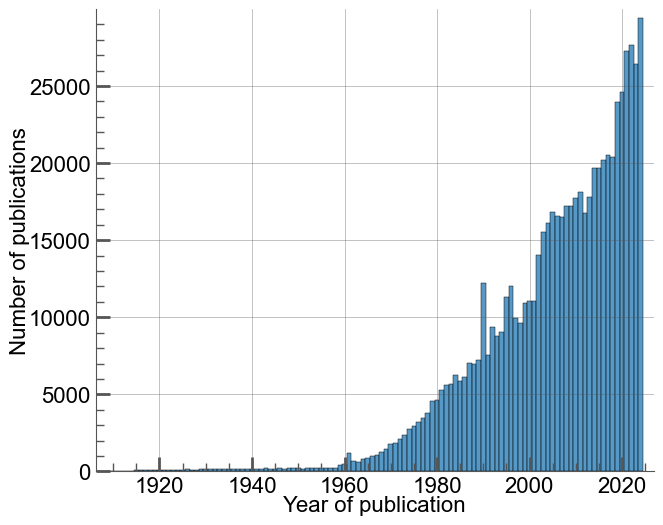

<Figure size 640x480 with 0 Axes>

In [12]:
years = works["year"].to_numpy()

with aq.load_theme("scientific"):
    sns.set_palette("viridis")
    plt.figure(figsize=(7.2, 6))
    sns.histplot(x=years, discrete=True, color="tab:blue")  
    plt.xlabel("Year of publication", fontsize=16)
    plt.xticks(fontsize=16)
    plt.ylabel("Number of publications", fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()

<Figure size 640x480 with 0 Axes>

<Figure size 720x600 with 0 Axes>

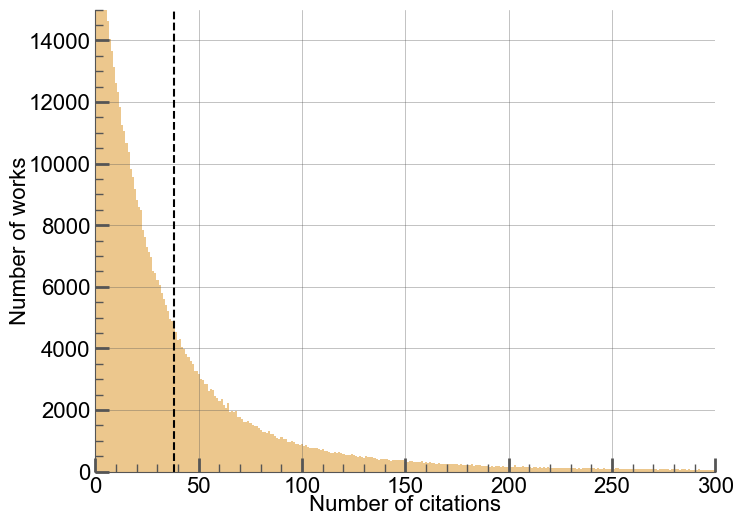

In [ ]:
color_gold = "#e6b567"

cited_counts = works["cited_by_count"].to_numpy()
mean_cited = cited_counts.mean()


with aq.load_theme("scientific"):
    plt.figure(figsize=(8, 6))
    sns.histplot(x=cited_counts, bins=range(0, 400), discrete=True, color=color_gold)  
    plt.xlim(0, 300)
    plt.ylim(0, 25000)
    plt.axvline(x=mean_cited, color="black", linestyle='dashed')
    plt.xlabel("Number of citations", fontsize=16)
    plt.ylabel("Number of works", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()

<Figure size 640x480 with 0 Axes>

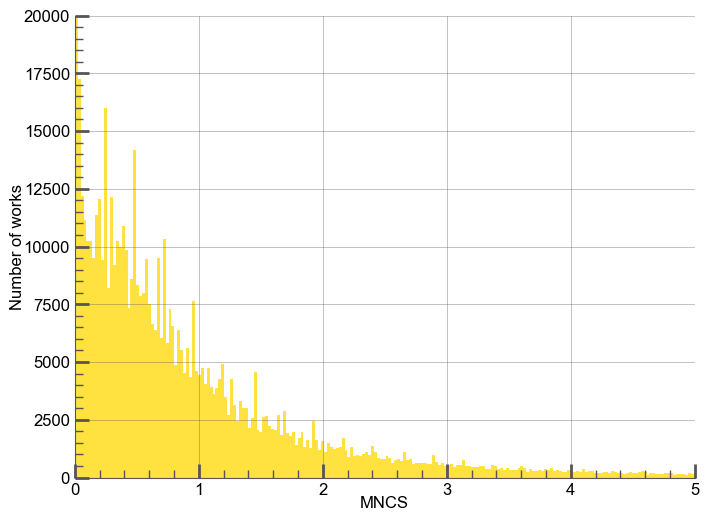

In [23]:
mncs_values = works["mncs"].to_numpy()

with aq.load_theme("scientific"):
    plt.figure(figsize=(8, 6))
    sns.histplot(x=mncs_values, discrete=False, color="gold") 
    plt.xlim(0, 5)
    plt.ylim(0, 20000)
    plt.xlabel("MNCS")
    plt.ylabel("Number of works")
    plt.show()

In [24]:
with aq.load_theme("scientific"):
    plt.figure(figsize=(7.2, 6))
    sns.lineplot(data = group_year_mean, x = "year", y = "cited_by_count", color = "#3944f3")
    plt.xlabel("Year of publication", fontsize=16)
    plt.ylabel("Number of citations", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()

mean_value = group_year_mean["cited_by_count"].mean()
median_value = group_year_mean["cited_by_count"].median()
print(f"Mean citations count: {mean_value}")
print(f"Median citations count: {median_value}")

NameError: name 'group_year_mean' is not defined

<Figure size 640x480 with 0 Axes>

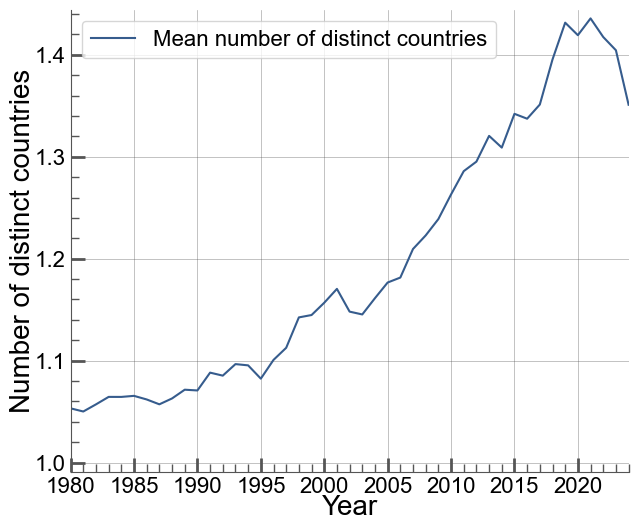

In [ ]:
with aq.load_theme("scientific"):
    plt.figure(figsize=(7.2, 6))
    sns.lineplot(data = group_year_mean, x = "year", y = "countries_distinct_count", color = sns.color_palette("viridis")[1], label='Mean number of distinct countries')
    plt.xlim(1980, 2024)
    plt.xlabel("Year", fontsize=20)
    plt.ylabel("Number of distinct countries", fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend(fontsize=16)
    plt.show()

<Figure size 640x480 with 0 Axes>

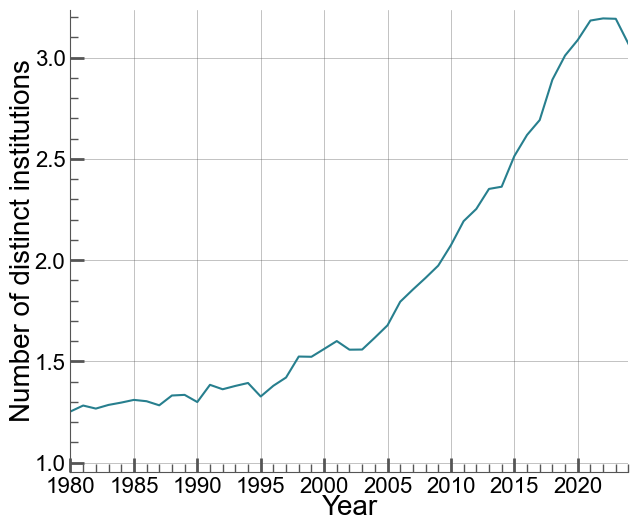

In [ ]:
with aq.load_theme("scientific"):
    plt.figure(figsize=(7.2, 6))
    sns.lineplot(data = group_year_mean, x = "year", y = "institutions_distinct_count", color = sns.color_palette("viridis")[2])
    plt.xlim(1980, 2024)
    plt.xlabel("Year", fontsize=20)
    plt.ylabel("Number of distinct institutions", fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()

In [ ]:

slope, intercept = np.polyfit(group_year_mean["year"], group_year_mean["referenced_works_count"], 1)
r_pearson, p_pearson = st.pearsonr(group_year_mean["year"], group_year_mean["referenced_works_count"])
print(f"Pearson: r = {r_pearson:.3f}, p-value = {p_pearson:.3f}")

r_spearman, p_spearman = st.spearmanr(group_year_mean["year"], group_year_mean["referenced_works_count"])
print(f"Spearman: rho = {r_spearman:.3f}, p-value = {p_spearman:.3f}")

Pearson: r = 0.894, p-value = 0.000
Spearman: rho = 0.975, p-value = 0.000


<Figure size 640x480 with 0 Axes>

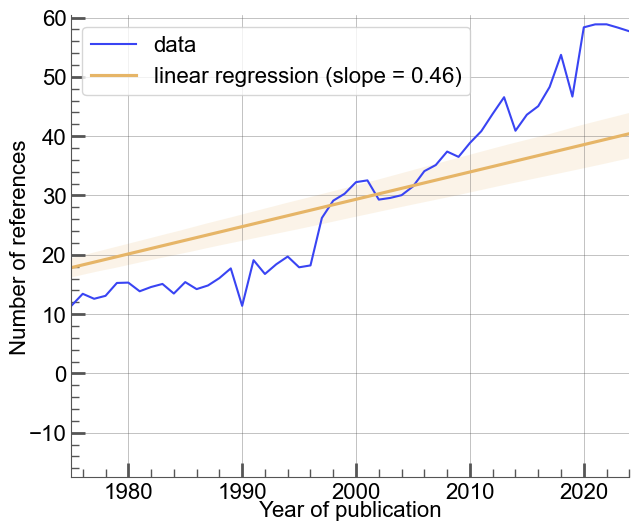

In [ ]:
color_gold = "#e6b567"

with aq.load_theme("scientific"):
    plt.figure(figsize=(7.2, 6))
    sns.lineplot(data = group_year_mean, x = "year", y = "referenced_works_count", color = "#3944f3", label = "data")
    sns.regplot(data = group_year_mean, x = "year", y = "referenced_works_count", color = color_gold, scatter=False, label=f"linear regression (slope = {slope:.2f})")
    plt.xlim(1975, 2024)
    plt.xlabel("Year of publication", fontsize=16)
    plt.ylabel("Number of references", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend(fontsize=16)
    plt.show()

In [ ]:

cited_counts = works["cited_by_count"].to_numpy()
mean_cited = cited_counts.mean()


with aq.load_theme("scientific"):
    plt.figure(figsize=(8, 6))
    sns.histplot(x=cited_counts, bins=range(0, 400), discrete=True, color=color_gold)  # ou color_gold
    plt.xlim(0, 500)
    plt.ylim(0, 15000)
    plt.axvline(x=mean_cited, color="black", linestyle='dashed')
    plt.xlabel("Number of citations", fontsize=16)
    plt.ylabel("Number of works", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()

'\ncited_counts = works["cited_by_count"].to_numpy()\nmean_cited = cited_counts.mean()\n\n\nwith aq.load_theme("scientific"):\n    plt.figure(figsize=(8, 6))\n    sns.histplot(x=cited_counts, bins=range(0, 400), discrete=True, color=color_gold)  # ou color_gold\n    plt.xlim(0, 500)\n    plt.ylim(0, 15000)\n    plt.axvline(x=mean_cited, color="black", linestyle=\'dashed\')\n    plt.xlabel("Number of citations", fontsize=16)\n    plt.ylabel("Number of works", fontsize=16)\n    plt.xticks(fontsize=16)\n    plt.yticks(fontsize=16)\n    plt.show()'

<Figure size 640x480 with 0 Axes>

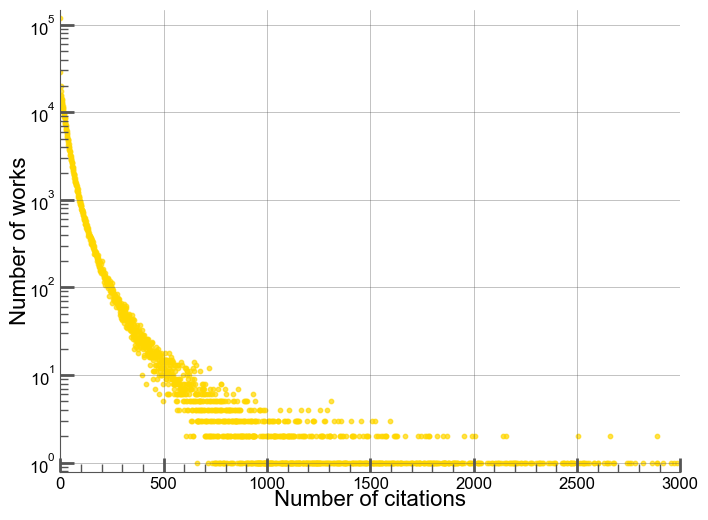

In [ ]:

counts = (
    works
    .group_by("cited_by_count")
    .agg(pl.len())
    .sort("cited_by_count")
)

x = counts["cited_by_count"].to_numpy()
y = counts["len"].to_numpy()

plt.figure(figsize=(8, 6))
plt.scatter(x, y, s=10, color="gold", alpha=0.7)
plt.yscale("log")
plt.xlim(0, 3000)
plt.xlabel("Number of citations", fontsize=16)
plt.ylabel("Number of works", fontsize=16)
plt.show()

In [ ]:
mncs_values = works["mncs"].to_numpy()

with aq.load_theme("scientific"):
    plt.figure(figsize=(8, 6))
    sns.histplot(x=mncs_values, discrete=False, color="gold") 
    plt.xlim(0, 5)
    plt.ylim(0, 17500)
    plt.xlabel("MNCS")
    plt.show()

'mncs_values = works["mncs"].to_numpy()\n\nwith aq.load_theme("scientific"):\n    plt.figure(figsize=(8, 6))\n    sns.histplot(x=mncs_values, discrete=False, color="gold") \n    plt.xlim(0, 5)\n    plt.ylim(0, 17500)\n    plt.xlabel("MNCS")\n    plt.show()'

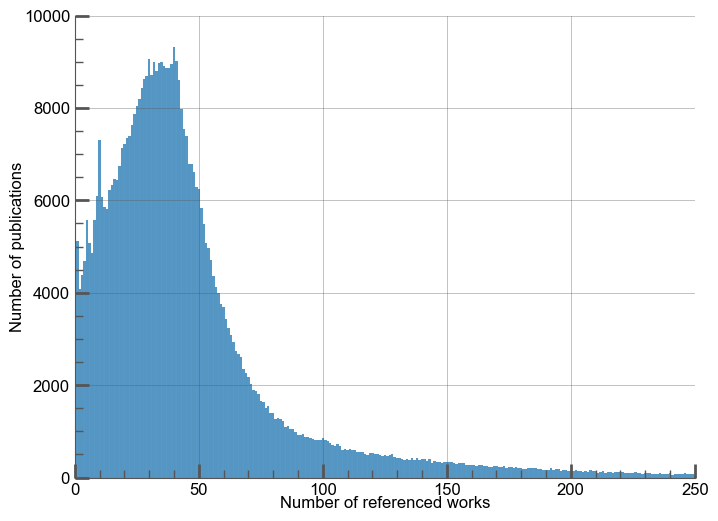

In [ ]:

referenced_counts = works["referenced_works_count"].to_numpy()

with aq.load_theme("scientific"):
    plt.figure(figsize=(8, 6))
    sns.histplot(x=referenced_counts, color="tab:blue", discrete=True)  # ou color_ensta si défini
    plt.xlim(0, 250)
    plt.ylim(0, 10000)
    plt.xlabel("Number of referenced works")
    plt.ylabel("Number of publications")
    plt.show()

<Figure size 640x480 with 0 Axes>

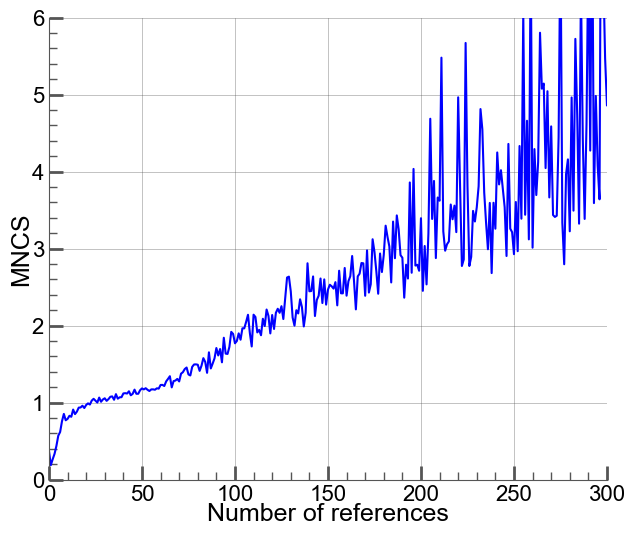

In [ ]:
x = group_references_mean["referenced_works_count"].to_numpy()  
y = group_references_mean["mncs"].to_numpy()

with aq.load_theme("scientific"):
    plt.figure(figsize=(7.2, 6))
    sns.lineplot(x=x, y=y, color="blue")
    plt.xlim(0, 300)
    plt.ylim(0, 6)
    plt.xlabel("Number of references", fontsize=18)
    plt.ylabel("MNCS", fontsize=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()

<Figure size 640x480 with 0 Axes>

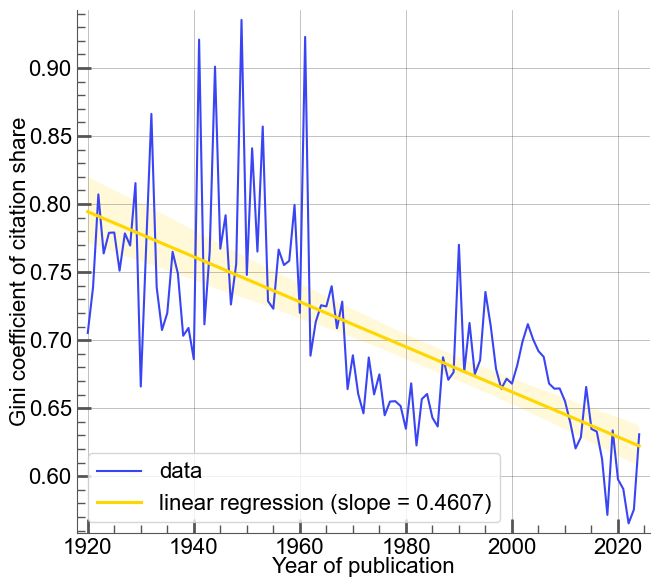

In [ ]:

x = list(range(year_begin, year_end + 1))
y = ginis  

with aq.load_theme("scientific"):
    plt.figure(figsize=(7.4, 6.8))
    
    # Ligne des données
    sns.lineplot(x=x, y=y, color="#3944f3", label="data")
    
    # Régression linéaire
    sns.regplot(x=x, y=y, color="gold", scatter=False, 
                label=f"linear regression (slope = {slope:.4f})")
    
    plt.xlabel("Year of publication", fontsize=16)
    plt.ylabel("Gini coefficient of citation share", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend(fontsize=16)
    plt.show()
